In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Problem 1

(1)

In [9]:
n = 5000

y = np.random.rand(n,1)
x = np.random.rand(n,1)
z = np.random.rand(n,1)

idx = np.empty((n,1))
count = 0

for i in range(n):
    if np.sqrt(x[i]**2 + y[i]**2 + z[i]**2) < 1:
        count += 1
        idx[i] = 1
    else:
        idx[i] = 0

print((count/n)*8)
print('Compare your estimation with the analytic solution  4*pi/3: ', np.pi*4/3)

4.1488
Compare your estimation with the analytic solution  4*pi/3:  4.1887902047863905


It is similiar between the result of estimation and analytic solution.

(2)

In [22]:
n = 5000

y = np.random.rand(n,1)
x = np.random.rand(n,1)
z = np.random.rand(n,1)

idx2 = np.empty((n,1))
count2 = 0

for i in range(n):
    if np.sqrt(x[i]**2 + y[i]**2 + z[i]**2) < 1 and np.sqrt((x[i]-1)**2 + y[i]**2 + z[i]**2) < 1:
        count2 += 1
        idx2[i] = 1
    else:
        idx2[i] = 0

print((count2/n)*4)
print('Compare your estimation with the analytic solution  5*pi/12: ', np.pi*5/12)

1.3128
Compare your estimation with the analytic solution  5*pi/12:  1.3089969389957472


It is similiar between the result of estimation and analytic solution.

### Problem 2

In [17]:
from six.moves import cPickle
table = cPickle.load(open('./data_files/problem2_data.pkl', 'rb'))

print(table.shape)

(1000, 3)


(1)

In [21]:
prob_y0 = 0
prob_y1 = 0

for i in range(len(table)):
    if(table[i,0] == 1 ):
        prob_y1 += 1
    else:
        prob_y0 += 1
        
print('Estimate the marginal distribution: ',float(prob_y0)/len(table), float(prob_y1)/len(table))   

Estimate the marginal distribution:  0.703 0.297


(2)

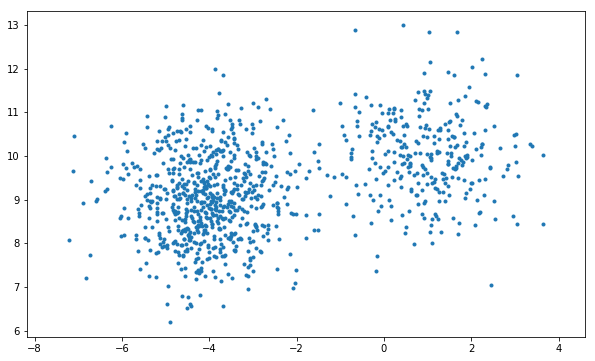

In [56]:
plt.figure(figsize=(10,6))
plt.plot(table[:,1], table[:,2], '.')
plt.axis('equal')
plt.show()

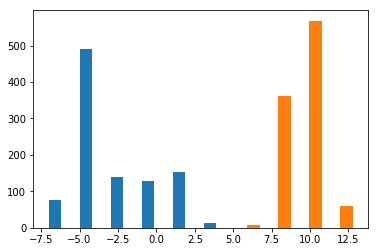

In [60]:
x = table[:,1]
y = table[:,2]
n, bins, patches = plt.hist([x, y])

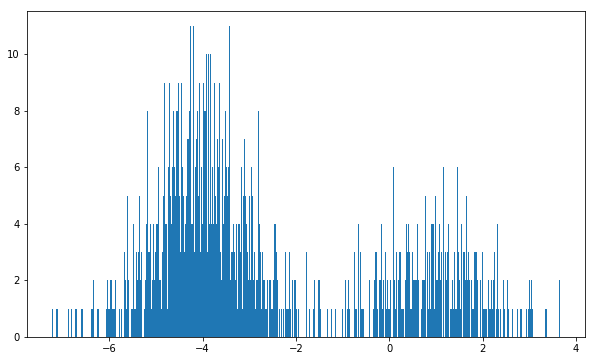

In [61]:
plt.figure(figsize=(10,6))
plt.hist(table[:,1], 500)
plt.show()

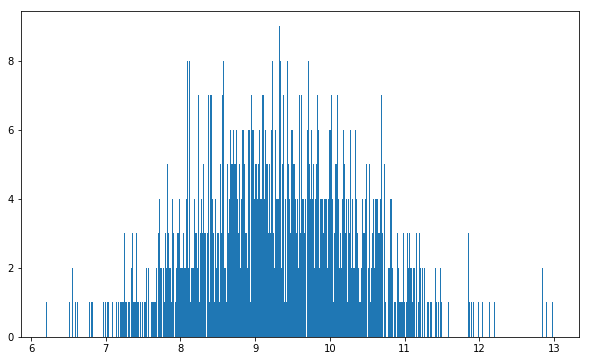

In [59]:
plt.figure(figsize=(10,6))
plt.hist(table[:,2], 500)
plt.show()

(3)

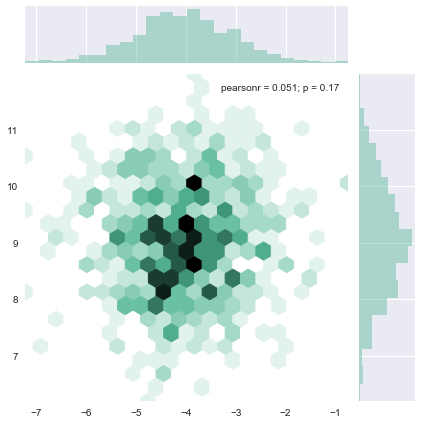

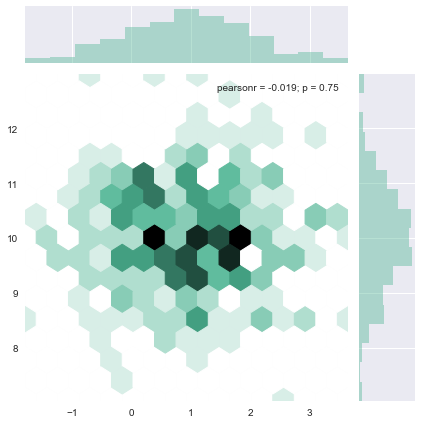

In [74]:
X1_0 = table[(table[:,0]==0),1]
X1_1 = table[(table[:,0]==1),1]
X2_0 = table[(table[:,0]==0),2]
X2_1 = table[(table[:,0]==1),2]

sns.jointplot(X1_0, X2_0, kind="hex", color="#4CB391")
sns.jointplot(X1_1, X2_1, kind="hex", color="#4CB391")

(4)

In [29]:
count = 0
cnt_y1 = 0

for i in range(len(table)):
    if( -6 < table[i,1] < -4 and 8 < table[i,2] < 11):
        count += 1
        if(table[i,1] == 1):
            cnt_y1 += 1
        
print('Compute the conditional probability: ',float(cnt_y1)/prob_y)

Compute the conditional probability:  0.0


### Problem 3

(3)

In [71]:
def stateTime(a, b, c, t):
    
    stateA = a
    stateB = b
    stateC = c

    for i in range(t):
        
        transA = stateA*0.3 + stateB*0.4 + stateC*0.5
        transB = stateA*0.6 + stateB*0.6 + stateC*0.5
        transC = stateA*0.1 + stateB*0.0 + stateC*0.0
    
    return transA, transB, transC

stateTime(1,0,0,5000)

(0.3, 0.6, 0.1)

### Problem 4

In [52]:
from six.moves import cPickle

data = cPickle.load(open('./data_files/problem4_data.pkl', 'rb'))
print(data.shape)

(100, 50, 40)


(1)

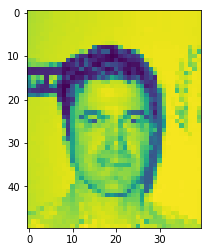

In [53]:
import random

num = random.randint(0,99)
plt.imshow(data[num])

(2)

In [63]:
data = data.reshape(100,50*40)

print(data.shape)
data

(100, 2000)


array([[ 17,  15,   7, ...,  23,  25,  23],
       [ 57,  51,  54, ...,  99, 163,  65],
       [ 25,  26,  26, ..., 211, 227, 233],
       ..., 
       [211, 211, 211, ..., 128, 156, 156],
       [ 31,  30,  29, ...,  39,  50,  75],
       [  8,   8,   8, ..., 120, 116, 111]], dtype=uint8)

(3)

In [83]:
m,n = data.shape

means = [np.mean(data[:,i]) for i in range(n)]

data = np.asmatrix(data - means)

S = 1/(m-1)*data.T*data
S = np.asmatrix(S)

print('covariance\n')
np.cov(S)

D, V = np.linalg.eig(S)
idx = np.argsort(-D)
D = D[idx]
V = V[:,idx]
print(D)
print(V)


pca = data*V[:,0]
print("eigen vector\n", pca)

covariance

[  3.96901096e+06 +0.00000000e+00j   9.25146536e+05 +0.00000000e+00j
   5.96124863e+05 +0.00000000e+00j ...,  -1.09877333e-10 +0.00000000e+00j
  -2.10327311e-10 +6.70665305e-11j  -2.10327311e-10 -6.70665305e-11j]
[[-0.03702325+0.j          0.02148807+0.j          0.01375201+0.j         ...,
  -0.02186581+0.j          0.00419877-0.00208783j  0.00419877+0.00208783j]
 [-0.03754474+0.j          0.02294787+0.j          0.01316221+0.j         ...,
  -0.00189101+0.j         -0.02291605+0.01265827j -0.02291605-0.01265827j]
 [-0.03761530+0.j          0.02279765+0.j          0.00802267+0.j         ...,
   0.00304332+0.j         -0.01607462-0.00815795j -0.01607462+0.00815795j]
 ..., 
 [-0.01000472+0.j         -0.04424024+0.j         -0.00448084+0.j         ...,
   0.00621385+0.j          0.00793671-0.00324138j  0.00793671+0.00324138j]
 [-0.00935253+0.j         -0.04346625+0.j         -0.00582587+0.j         ...,
   0.00027542+0.j         -0.00064126-0.00213518j -0.00064126+0.00213518j

(4)

In [80]:
print("eigen vecotr to real\n")
feig = np.real(V[:,0])
feig = feig.reshape(50,40)
print(feig)
print(feig.shape)

eigen vecotr to real

[[-0.03702325 -0.03754474 -0.0376153  ..., -0.03638443 -0.0359893
  -0.03560782]
 [-0.03692796 -0.03739918 -0.03774277 ..., -0.03689349 -0.03623034
  -0.03596721]
 [-0.03664075 -0.03666344 -0.03712044 ..., -0.03754221 -0.03665813
  -0.03598615]
 ..., 
 [-0.01960887 -0.01904934 -0.01464109 ..., -0.01248196 -0.01259293
  -0.01333845]
 [-0.02090077 -0.01688811 -0.01566454 ..., -0.01131579 -0.01083719
  -0.01114795]
 [-0.01969766 -0.01752704 -0.01404517 ..., -0.01000472 -0.00935253
  -0.00961789]]
(50, 40)


The End of Document